In [1]:
import numpy as np
import pickle
from utils.partition import weight_update_statistics
from utils.flower_detection import mal_agents_update_statistics
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [2]:
kappas = np.round(np.concatenate((np.arange(0, 1.1, 0.1), np.arange(5,55,5))),3)
print(kappas)
print(len(kappas))

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   5.  10.  15.
 20.  25.  30.  35.  40.  45.  50. ]
21


In [3]:
meta_metrics = {}

for i in range(1,21):
    with open(f'data/reproducibility_detection2/{i}_metrics.pkl', 'rb') as handle:
        metrics = pickle.load(handle)
    meta_metrics[i] = metrics
    

results = {}

for kappa in kappas:
    result_at_kappa = []
    #print(kappa)
    for i in meta_metrics.keys():
        detected = mal_agents_update_statistics(meta_metrics[i], kappa=kappa)
        result_at_kappa.append(detected)
    results[str(np.round(kappa,2))] = result_at_kappa
    
with open('data/reproducibility_detection2_kappas_new.pkl', 'wb') as handle:
    pickle.dump(results,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
meta_metrics[1].keys()

dict_keys(['2', '6', '7', '0', '3', '5', '8', '9', '4', '1'])

In [5]:
with open('data/reproducibility_detection2_kappas_new.pkl', 'rb') as handle:
    results = pickle.load(handle)

In [6]:
results.keys()

dict_keys(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0', '5.0', '10.0', '15.0', '20.0', '25.0', '30.0', '35.0', '40.0', '45.0', '50.0'])

In [7]:
#detected = mal_agents_update_statistics(meta_metrics[1], kappa=kappa)
#print(detected)

In [8]:
#results
results['1.0']

[array([0., 1., 0., 1., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])]

In [9]:
#results
results['1.0']

[array([0., 1., 0., 1., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])]

In [10]:
Y_true = [0, 0, 0, 1, 0, 0, 0, 0 ,0 ,0] * 20
results_uni = {}
for key in results.keys():
    results_uni[key] = np.concatenate(results[key])

In [11]:
len(Y_true)

200

In [13]:
results_uni['1.0']

array([0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [14]:
l_accu = []
l_TPR = []
l_FPR = []

for key in results_uni.keys():
    accu = accuracy_score(Y_true, results_uni[key])
    cmtx = confusion_matrix(Y_true, results_uni[key])
    TN = cmtx[0,0]
    FN = cmtx[1,0]
    TP = cmtx[1,1]
    FP = cmtx[0,1]
    TPR = TP / (TP+FN)
    FPR = FP / (FP+TN)
    
    if key in ['0.2', '0.6']:
        print(key)
        print(cmtx)
    l_accu.append(accu)
    l_TPR.append(TPR)
    l_FPR.append(FPR) 
    
    

0.2
[[ 49 131]
 [  0  20]]
0.6
[[164  16]
 [  0  20]]


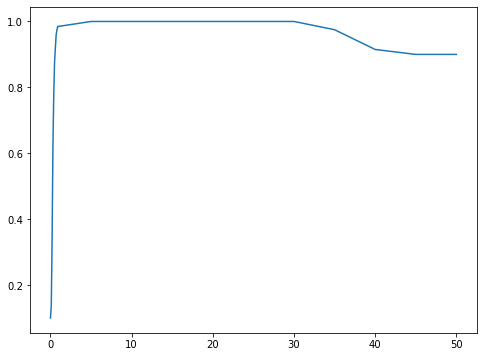

In [15]:
fig1 = plt.figure(figsize=(8,6))
ax1 = fig1.add_subplot(1,1,1)

ax1.plot(kappas, l_accu)

Text(0, 0.5, 'True Positive Rate')

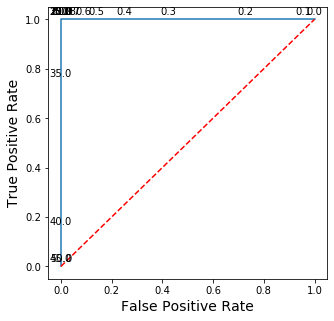

In [16]:
fig1 = plt.figure(figsize=(5,5))
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(l_FPR, l_TPR)
ax1.plot([0,1], [0,1], color = 'r', ls='--')
for i, (FPR, TPR) in enumerate(zip(l_FPR, l_TPR)):
    #if (i % 2 == 0 or i == 5) and (i != 10):
    ax1.text(FPR, TPR+0.01, kappas[i], horizontalalignment='center', verticalalignment='bottom')
    #if i > 15:
    #    break
ax1.set_xlabel("False Positive Rate", fontsize = 14)
ax1.set_ylabel("True Positive Rate", fontsize = 14)

## Sanity check

In [ ]:
test_metrics = {}
test_metrics[0] = np.random.rand(2000,2)
test_metrics[1] = np.random.rand(2000,2)*(4)
test_metrics[2] = np.random.rand(2000,2)
test_metrics[3] = np.random.rand(2000,2)
test_metrics[4] = np.random.rand(2000,2)

mal_agents_update_statistics(test_metrics, kappa=1, fix=True)